In [6]:
import pandas as pd
path = "C:\\Users\\monte\\Downloads\\dataset_sale\\train.csv"
df = pd.read_csv(path)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


In [10]:
print(df_cleaned.describe())
print(df_cleaned[df_cleaned['Sales'] < 0])

            Row ID   Postal Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000
Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales]
Index: []


In [11]:
print(df_cleaned.duplicated().sum())

0


In [12]:
print(df_cleaned.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [13]:
df_cleaned.to_csv('sale_data_cleaned.csv', index = False)

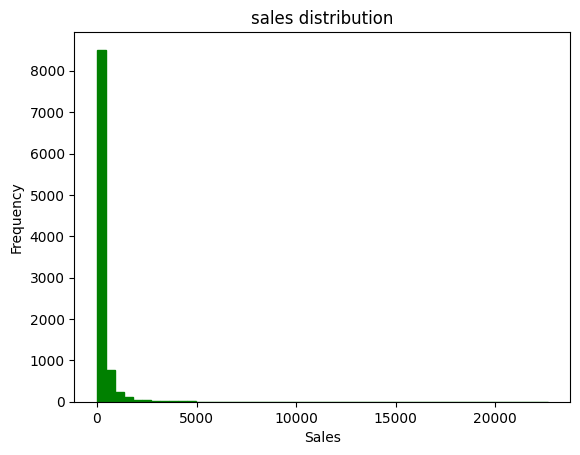

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sale distribution
plt.hist(df_cleaned['Sales'], bins = 50, color = 'green', edgecolor = 'green')
plt.title('sales distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

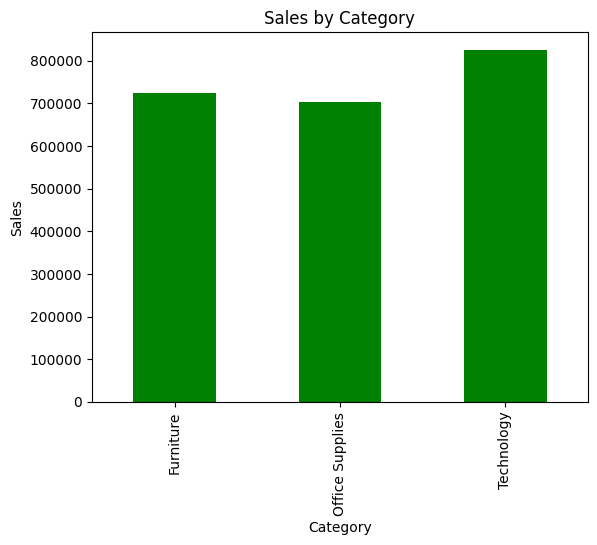

In [15]:
# Analyse sales by product category

sales_by_category = df_cleaned.groupby('Category')['Sales'].sum()
sales_by_category.plot(kind = 'bar', color = 'green')
plt.title('Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


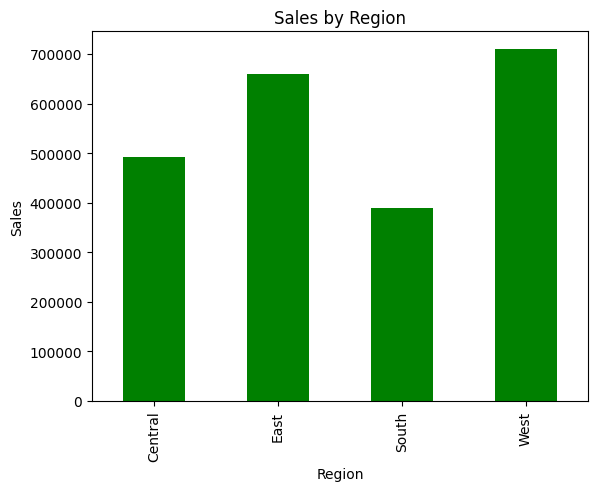

In [16]:
# Analyse Sales by Region

sales_by_region = df_cleaned.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind = 'bar', color = 'green')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

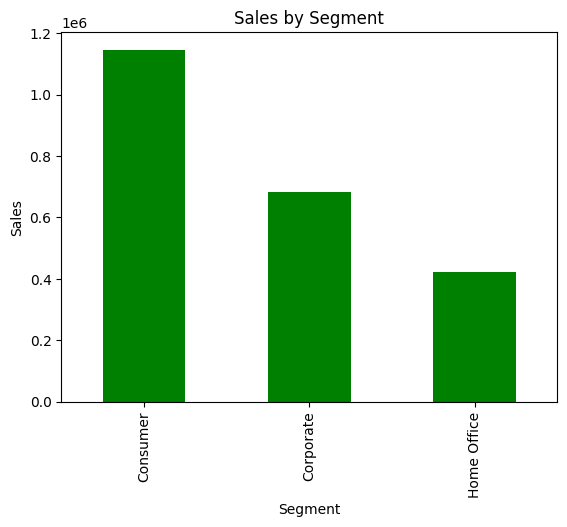

In [17]:
# Compare sales between customer segments 

sales_by_segment = df_cleaned.groupby('Segment')['Sales'].sum()
sales_by_segment.plot(kind = 'bar', color = 'green')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

C:\Users\monte\AppData\Local\Temp\ipykernel_19724\4137806039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], dayfirst=True)
C:\Users\monte\AppData\Local\Temp\ipykernel_19724\4137806039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Month'] = df_cleaned['Order Date'].dt.to_period('M')


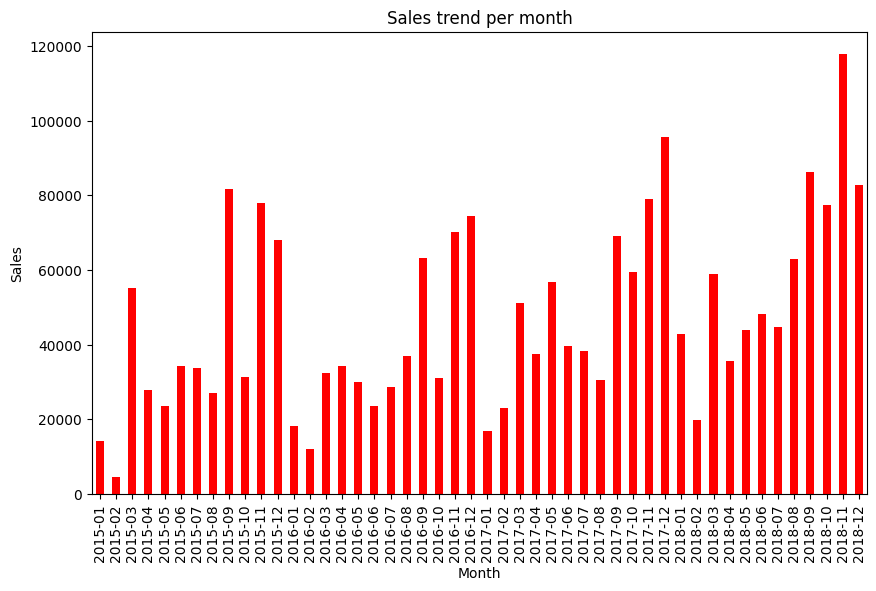

In [18]:
# Conversion
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], dayfirst=True)
df_cleaned['Month'] = df_cleaned['Order Date'].dt.to_period('M')
# Analyse Sales trend per month
sales_over_time = df_cleaned.groupby('Month')['Sales'].sum()
sales_over_time.plot(kind = 'bar', color = 'red', figsize = (10, 6))
plt.title('Sales trend per month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


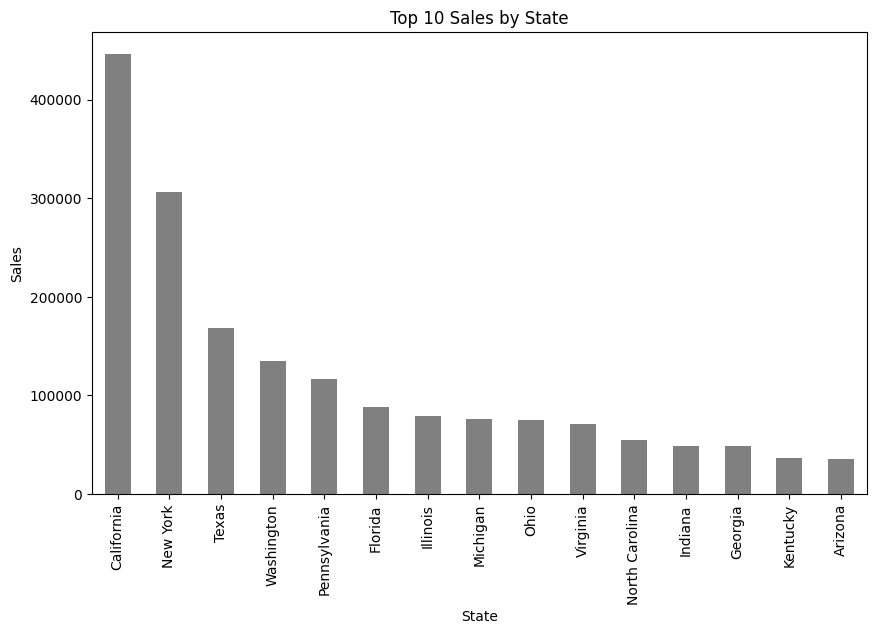

In [19]:
# Analysis of Sales by state

sales_by_state = df_cleaned.groupby('State')['Sales'].sum()
sales_by_state = sales_by_state.sort_values(ascending = False).head(15)
sales_by_state.plot(kind = 'bar', color = 'grey', figsize= (10, 6))
plt.title( 'Top 10 Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()

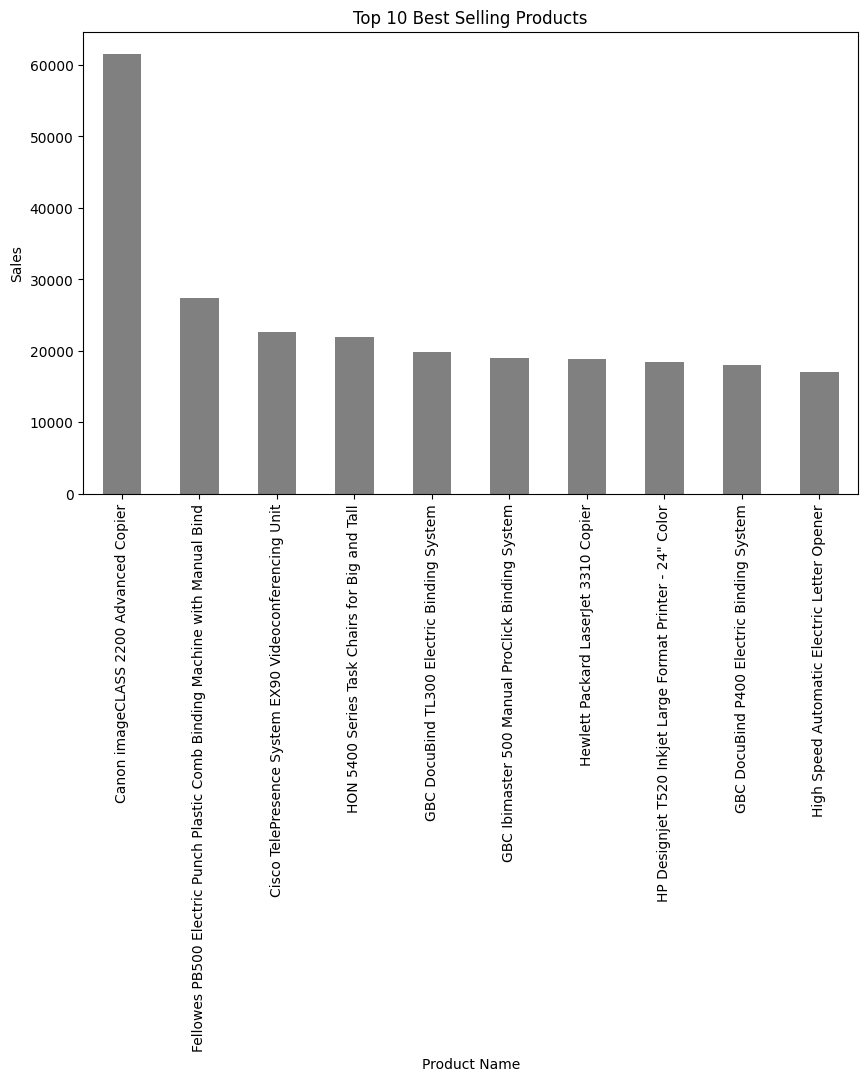

In [20]:
# the best-selling products

best_selling_products = df_cleaned.groupby('Product Name')['Sales'].sum()
best_selling_products = best_selling_products.sort_values(ascending = False).head(10)
best_selling_products.plot(kind = 'bar', color = 'grey', figsize = (10, 6))
plt.title('Top 10 Best Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()




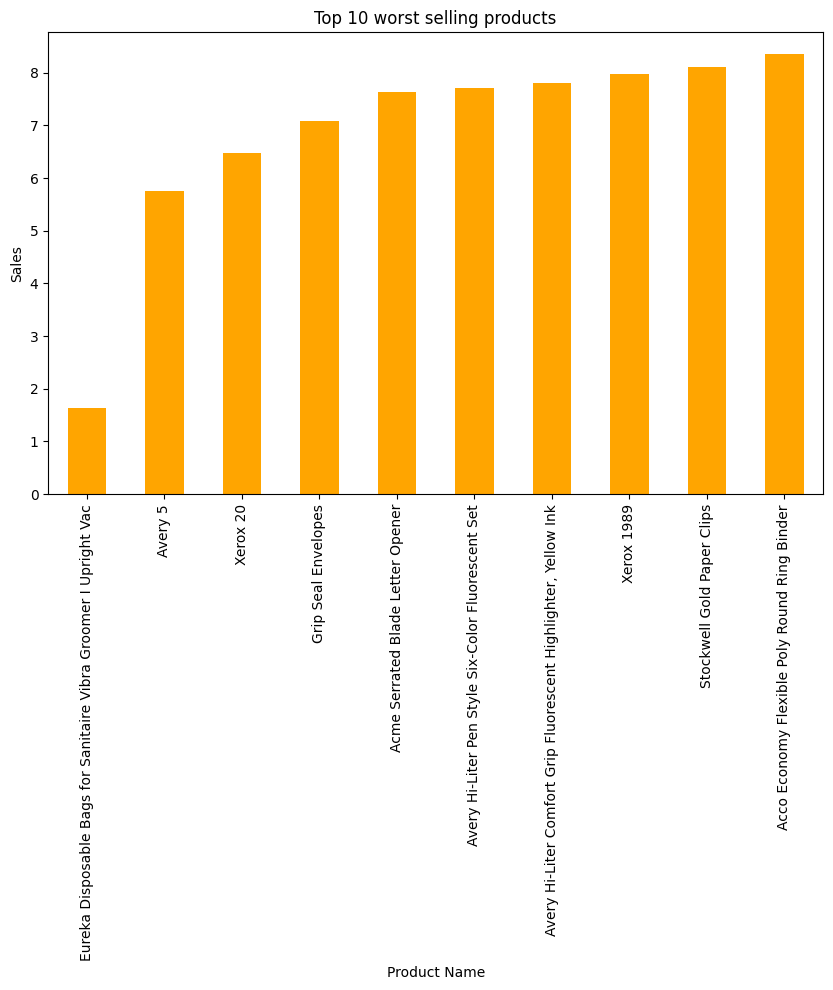

In [21]:
# the worst-selling products

worst_selling_products = df_cleaned.groupby('Product Name')['Sales'].sum()
worst_selling_products = worst_selling_products.sort_values(ascending = True).head(10)
worst_selling_products.plot(kind = 'bar', color = 'orange', figsize=(10,6))
plt.title('Top 10 worst selling products')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()


In [33]:
features = df_cleaned[['Category', 'Sub-Category', 'Region']]
target = df_cleaned['Sales']
features = pd.get_dummies(features)

In [ ]:
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'], format="%d/%m/%Y")
df_cleaned['Ship Date'] = pd.to_datetime(df_cleaned['Ship Date'], format="%d/%m/%Y")
df_cleaned['Postal Code'] = df_cleaned['Postal Code'].astype('Int64')
df_cleaned['Sales'] = pd.to_numeric(df_cleaned['Sales'])
print(df_cleaned.dtypes)


In [36]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression model to predict sales
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
print('Mean Squared Error:', linear_mse)


Mean Squared Error: 380095.43791354506


In [38]:
# Let's extract the coefficients from the model to interpret the impact of the characteristics
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))


                     Feature   Coefficient
17      Sub-Category_Storage  1.605434e+15
4    Sub-Category_Appliances  1.605434e+15
18     Sub-Category_Supplies  1.605434e+15
6       Sub-Category_Binders  1.605434e+15
15        Sub-Category_Paper  1.605434e+15
10    Sub-Category_Envelopes  1.605434e+15
13       Sub-Category_Labels  1.605434e+15
5           Sub-Category_Art  1.605434e+15
11    Sub-Category_Fasteners  1.605434e+15
9       Sub-Category_Copiers  1.591440e+15
14     Sub-Category_Machines  1.591440e+15
16       Sub-Category_Phones  1.591440e+15
3   Sub-Category_Accessories  1.591440e+15
0         Category_Furniture  9.034947e+14
22              Region_South  3.940931e+14
21               Region_East  3.940931e+14
20            Region_Central  3.940931e+14
23               Region_West  3.940931e+14
19       Sub-Category_Tables -1.023843e+14
8        Sub-Category_Chairs -1.023843e+14
7     Sub-Category_Bookcases -1.023843e+14
12  Sub-Category_Furnishings -1.023843e+14
2        Ca

In [39]:
# Decision Tree model to predict sales
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_r2 = tree_model.score(X_test, y_test)
print('Decision Tree - Mean Squared Error:', tree_mse, 'R2:', tree_r2)

Decision Tree - Mean Squared Error: 377144.152067997 R2: 0.2289549294074451


In [40]:
# Random Forest model to predict sales
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = forest_model.score(X_test, y_test)
print('Random Forest - Mean Squared Error:', forest_mse, 'R2:', forest_r2)

(tree_mse, tree_r2, forest_mse, forest_r2)  

Random Forest - Mean Squared Error: 374589.06901047856 R2: 0.23417861956849262


(377144.152067997, 0.2289549294074451, 374589.06901047856, 0.23417861956849262)

In [41]:
# Extract the importance of characteristics from the Random Forest model to understand which variables have the greatest influence on sales.

importances = forest_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                     Feature  Importance
9       Sub-Category_Copiers    0.265537
14     Sub-Category_Machines    0.255021
1   Category_Office Supplies    0.136127
12  Sub-Category_Furnishings    0.077727
22              Region_South    0.047882
21               Region_East    0.039426
2        Category_Technology    0.037678
20            Region_Central    0.029510
17      Sub-Category_Storage    0.027938
23               Region_West    0.021709
3   Sub-Category_Accessories    0.019694
4    Sub-Category_Appliances    0.012339
6       Sub-Category_Binders    0.006861
18     Sub-Category_Supplies    0.006107
19       Sub-Category_Tables    0.004821
0         Category_Furniture    0.003759
16       Sub-Category_Phones    0.002876
8        Sub-Category_Chairs    0.002410
7     Sub-Category_Bookcases    0.001765
15        Sub-Category_Paper    0.000445
10    Sub-Category_Envelopes    0.000201
11    Sub-Category_Fasteners    0.000115
5           Sub-Category_Art    0.000035
13       Sub-Cat

In [42]:
## Model Validation and Refinement : Cross Validation
from sklearn.model_selection import cross_val_score

# With Decision Tree model
tree_cv_scores = cross_val_score(tree_model, features, target, cv=5, scoring='neg_mean_squared_error')
tree_cv_mse = -tree_cv_scores.mean()
print(f"Decision Tree - Cross-Validated Mean Squared Error: {tree_cv_mse}")

# With Random Forest model
forest_cv_scores = cross_val_score(forest_model, features, target, cv=5, scoring='neg_mean_squared_error')
forest_cv_mse = -forest_cv_scores.mean()
print(f"Random Forest - Cross-Validated Mean Squared Error: {forest_cv_mse}")


Decision Tree - Cross-Validated Mean Squared Error: 325420.8141672852
Random Forest - Cross-Validated Mean Squared Error: 324956.34217748675


In [43]:
## Model Validation and Refinement : Hyperparameter Tuning

# with decision tree model
from sklearn.model_selection import GridSearchCV
tree_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 10, 20]}

tree_grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_param_grid, cv=5, scoring='neg_mean_squared_error')
tree_grid_search.fit(X_train, y_train)

best_tree_model = tree_grid_search.best_estimator_
best_tree_predictions = best_tree_model.predict(X_test)
best_tree_mse = mean_squared_error(y_test, best_tree_predictions)
print(f"Best Decision Tree - Mean Squared Error: {best_tree_mse}")
print(f"Best Decision Tree Parameters: {tree_grid_search.best_params_}")

# with random forest model
forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30]
}

forest_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), forest_param_grid, cv=5, scoring='neg_mean_squared_error')
forest_grid_search.fit(X_train, y_train)

best_forest_model = forest_grid_search.best_estimator_
best_forest_predictions = best_forest_model.predict(X_test)
best_forest_mse = mean_squared_error(y_test, best_forest_predictions)
print(f"Best Random Forest - Mean Squared Error: {best_forest_mse}")
print(f"Best Random Forest Parameters: {forest_grid_search.best_params_}")


Best Decision Tree - Mean Squared Error: 377135.0137708086
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_split': 20}
Best Random Forest - Mean Squared Error: 374474.2977880902
Best Random Forest Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}


c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.p